In [146]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from datetime import datetime, date, time
import json

In [151]:
def read_date(f):
    line = json.loads(f)
    date = pd.Timestamp(line["published"]["$date"])
    return (line["_id"], date)

In [152]:
%%time
with open("../data/train.json") as f:
    lines = pd.DataFrame([read_date(line) for line in f.readlines()],
                         columns=["_id", "publ_date"])

CPU times: user 56.6 s, sys: 2.08 s, total: 58.7 s
Wall time: 58.7 s


In [168]:
Date_train, Date_test, rub1, rub2 = train_test_split(lines, Y, test_size=0.1, random_state=0)
date_string_train = Date_train.publ_date.apply(lambda x: x.toordinal()).values.reshape(-1,1)
date_string_test  = Date_test.publ_date.apply(lambda x: x.toordinal()).values.reshape(-1,1)

In [28]:
Y = pd.read_csv("../data/train_target.csv").target.values

In [232]:
pd_train = pd.read_json("../data/train.json", lines=True)

In [106]:
X_train_raw, X_test_raw, Y_train, Y_test = train_test_split(pd_train, Y, test_size=0.1, random_state=0)

In [178]:
X_train_pre = X_train_raw.content.apply(lambda x: len(x.split())).values.reshape(-1,1)
X_train_pre1 = X_train_raw.title.apply(lambda x: len(x.split())).values.reshape(-1,1)
X_train_pre2 = np.log(X_train_pre1)

In [181]:
lb = preprocessing.LabelBinarizer()
X_train = np.concatenate([X_train_pre, lb.fit_transform(X_train_raw.domain),date_string_train,X_train_pre2],axis = 1)
lb1 = preprocessing.LabelBinarizer()
lb2 = lb1.fit_transform(pd_train1.robots.fillna('hg'))

In [182]:
reg = LinearRegression(fit_intercept=True)
reg.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [183]:
X_test_pre = X_test_raw.content.apply(lambda x: len(x.split())).values.reshape(-1,1)
X_test_pre1 = X_test_raw.title.apply(lambda x: len(x.split())).values.reshape(-1,1)
X_test_pre2 = np.log(X_test_pre1)
X_test = np.concatenate([X_test_pre, lb.fit_transform(X_test_raw.domain),date_string_test,X_test_pre2],axis = 1)

In [184]:
Y_prediction = reg.predict(X_test)

In [185]:
mean_absolute_error(Y_test, Y_prediction)

0.97909761212134372

Validation

In [58]:
pd_test = pd.read_json("../data/test.json", lines=True)

In [59]:
valid = pd_test.content.apply(lambda x: len(x.split())).values.reshape(-1,1)

In [64]:
output_name = "../results/number_of_words.csv"

In [83]:
V_result = pd.read_json("../data/test.json", lines=True)[["_id"]].rename(columns={"_id": "url"})

In [69]:
V_result['target'] = reg.predict(valid)

In [70]:
V_result.to_csv(output_name, index=False)

In [71]:
!head $output_name

url,target
https://geektimes.ru/post/87455/,2.1877435186706897
https://geektimes.ru/post/87452/,3.0687727630380364
https://geektimes.ru/post/87459/,2.1712756823273747
https://habrahabr.ru/post/87461/,2.1951540450251814
https://habrahabr.ru/post/5754/,2.2626721740327724
https://geektimes.ru/post/87460/,3.0778300730268593
https://geektimes.ru/post/87462/,2.4948686664735122
https://habrahabr.ru/post/87467/,2.230559893163308
https://habrahabr.ru/post/87464/,2.9164452768623734


In [143]:
X_train_raw.published[0].values()

dict_values(['2006-07-15T01:48:00.000Z'])

In [144]:
pd1 = pd.Timestamp(X_train_raw.published[0].values())

TypeError: Cannot convert input [dict_values(['2006-07-15T01:48:00.000Z'])] of type <class 'dict_values'> to Timestamp

In [126]:
X_test.shape

(12000, 2)

In [179]:
X_train_pre1[1]

array([9])

In [180]:
X_train_pre2[1]

array([ 2.19722458])

In [186]:
Y

array([ 0.693147,  1.098612,  0.      , ...,  3.044522,  4.110874,
        1.386294])

In [187]:
Y_new = pd.read_csv("../data/train_target.csv")

In [188]:
Y_new

,url,target
0,https://habrahabr.ru/post/7/,0.693147
1,https://geektimes.ru/post/11/,1.098612
2,https://geektimes.ru/post/112/,0.000000
3,https://geektimes.ru/post/1127/,0.000000
4,https://geektimes.ru/post/12664/,0.000000
5,https://geektimes.ru/post/168615/,1.386294
6,https://habrahabr.ru/post/168617/,3.433987
7,https://geektimes.ru/post/257768/,4.969813
8,https://habrahabr.ru/post/168625/,1.609438
9,https://habrahabr.ru/post/168631/,3.295837


In [189]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/opt/conda/lib/python3.6/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['clf', 'f', 'datetime']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


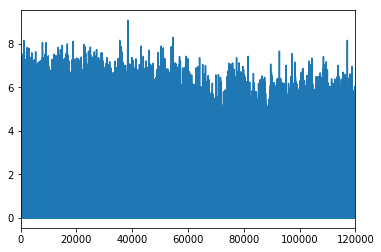

In [193]:
Y_new.target.plot()

In [207]:
Y_new = np.concatenate([date_string_train[:,0],Y_train[:,0]],axis = 1)

IndexError: too many indices for array

In [201]:
date_string_train.shape

(108000, 1)

ValueError: Length of values does not match length of index

In [212]:
date_string = lines.publ_date.apply(lambda x: x.toordinal()).values.reshape(-1,1)

In [225]:
Y_new = pd.read_csv("../data/train_target.csv").target.values.reshape(-1,1)

In [211]:
date_string.shape

(120000,)

In [221]:
Y_new = np.concatenate([date_string,Y_new],axis = 1)

In [224]:
Y_new1 = Y_new

In [229]:
Y_new['dt'] = Y_new1[0]

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [223]:
Y_new.plot()

AttributeError: 'numpy.ndarray' object has no attribute 'plot'

In [230]:
Y_new[0]

array([ 0.693147])

In [242]:
pd_train

,_id,_timestamp,author,content,domain,flags,flow,hubs,link_tags,meta_tags,polling,post_id,published,tags,title,url
0,https://habrahabr.ru/post/7/,1.493192e+09,"{'name': 'Павел Титов', 'nickname': '@ptitov',...","У меня такое ощущение, что logout время от вре...",habrahabr.ru,[],NaN,"[{'title': 'Хабрахабр', 'url': 'https://habrah...",{'image_src': 'https://habrahabr.ru/i/habralog...,"{'viewport': 'width=1024', 'description': 'У м...",None,7,{'$date': '2006-07-15T01:48:00.000Z'},"[логин, login]",Самопроизвольное разлогинивание,https://habrahabr.ru/post/7/
1,https://geektimes.ru/post/11/,1.493192e+09,"{'name': 'Александр Величко', 'nickname': '@Al...","Я вот тут подумал, смотря, скажем, на <a href=...",geektimes.ru,[],NaN,"[{'title': 'Чёрная дыра', 'url': 'https://geek...",{'image_src': 'https://geektimes.ru/images/log...,"{'viewport': 'width=1024', 'description': 'Я в...",None,11,{'$date': '2006-07-15T14:23:00.000Z'},"[сообщества, интернет-сообщество, социальные, ...",Stand-along cообщества против сообществ в рамк...,https://geektimes.ru/post/11/
2,https://geektimes.ru/post/112/,1.493192e+09,"{'name': 'Юрий Баландин', 'nickname': '@geraxe...",Да! Действительно утром зашел. И опустил карму...,geektimes.ru,[],NaN,"[{'title': 'Чёрная дыра', 'url': 'https://geek...",{'image_src': 'https://geektimes.ru/images/log...,"{'viewport': 'width=1024', 'description': 'Да!...",None,112,{'$date': '2006-07-04T01:54:00.000Z'},"[карма, голосование, скунс]",К нам скунс заходил,https://geektimes.ru/post/112/
3,https://geektimes.ru/post/1127/,1.493192e+09,"{'name': 'Дима Ловерманн', 'nickname': '@lover...","Ну, не прошло и нескольких дней, как Cisco под...",geektimes.ru,[],NaN,"[{'title': 'IT-компании', 'url': 'https://geek...",{'image_src': 'https://geektimes.ru/images/log...,"{'viewport': 'width=1024', 'description': 'Ну,...",None,1127,{'$date': '2007-01-11T03:37:00.000Z'},"[iPhone, Cisco, Apple, судебное разбирательств...",Cisco подаёт в суд на Apple за использование т...,https://geektimes.ru/post/1127/
4,https://geektimes.ru/post/12664/,1.493193e+09,"{'name': 'Макс Магляс', 'nickname': '@Tylerska...",На прошлой неделе в сети то тут то там появлял...,geektimes.ru,[],NaN,"[{'title': 'Чёрная дыра', 'url': 'https://geek...",{'image_src': 'https://geektimes.ru/images/log...,"{'viewport': 'width=1024', 'description': 'На ...",None,12664,{'$date': '2007-07-30T16:18:00.000Z'},"[афера, обман, мошенничество, ноутбук за, 150,...",Подробности о Medison Celebrity: халявы не буд...,https://geektimes.ru/post/12664/
5,https://geektimes.ru/post/168615/,1.493205e+09,"{'name': 'Revaz Rezo', 'nickname': '@revazrezo...",Очень полезное приложение обнаружилось недавно...,geektimes.ru,[],NaN,"[{'title': 'Чёрная дыра', 'url': 'https://geek...",{'image_src': 'https://geektimes.ru/images/log...,"{'viewport': 'width=1024', 'description': 'Оче...",None,168615,{'$date': '2013-02-09T18:02:00.000Z'},"[nokia, n9, meego, harmattan, fastern9, faster]",FasterN9 для Nokia N9 (MeeGo Harmattan): улучш...,https://geektimes.ru/post/168615/
6,https://habrahabr.ru/post/168617/,1.493205e+09,"{'name': 'marks', 'nickname': '@marks', 'url':...","<img src=""https://habrastorage.org/storage2/ee...",habrahabr.ru,[],NaN,"[{'title': 'Настройка Linux', 'url': 'https://...",{'image_src': 'https://habrastorage.org/storag...,"{'viewport': 'width=1024', 'description': ' ...",None,168617,{'$date': '2013-02-07T14:06:00.000Z'},"[Ubuntu Phone, Ubuntu Phone os]",Ubuntu Phone можно будет купить в октябре 2013...,https://habrahabr.ru/post/168617/
7,https://geektimes.ru/post/257768/,1.493205e+09,"{'name': 'Николай Маслухин', 'nickname': '@Mas...","В конце позапрошлого года <a href=""http://geek...",geektimes.ru,[],NaN,"[{'title': 'DIY или Сделай сам', 'url': 'https...",{'image_src': 'https://geektimes.ru/images/log...,"{'viewport': 'width=1024', 'description': 'В к...",None,257768,{'$date': '2013-02-07T14:11:00.000Z'},"[Raspberry Pi, siriproxy, умный дом, ios]",Raspberry Pi + Siri = голосовое управление домом,

In [236]:
lb1 = preprocessing.LabelBinarizer()
lb2 = lb1.fit_transform(pd_train.flags)

ValueError: You appear to be using a legacy multi-label data representation. Sequence of sequences are no longer supported; use a binary array or sparse matrix instead.

In [251]:
data = pd_train1
def code_myohe(data, feature):
    for i in data[feature].unique():
        data[feature + '_' + i] = (data[feature] == i).astype(float)
code_myohe(data,'robots')
data

TypeError: must be str, not float

In [244]:
def open_dict(d):
    for k, v in d.items():
        if type(v) is dict:
            for _k, _v in open_dict(v):
                yield _k, _v
        else:
            yield k, v

def parse_line(l):
    x = json.loads(l)
    return dict(open_dict(x))

with open("../data/train.json", "r") as f:
    pd_train1 = pd.DataFrame([parse_line(l) for l in f.readlines()])

with open("../data/test.json", "r") as f:
    pd_test1 = pd.DataFrame([parse_line(l) for l in f.readlines()])

In [247]:
pd_train1

,$date,_id,_timestamp,al:android:app_name,al:android:package,al:android:url,al:windows_phone:app_id,al:windows_phone:app_name,al:windows_phone:url,alternate,...,referrer,robots,stylesheet,tags,title,twitter:card,twitter:site,url,viewport,yandex-verification
0,2006-07-15T01:48:00.000Z,https://habrahabr.ru/post/7/,1.493192e+09,Habrahabr,ru.habrahabr,habrahabr://post/7,460a6bd6-8955-470f-935e-9ea1726a6060,Habrahabr,habrahabr://post/7,https://habrahabr.ru/rss/post/7/,...,unsafe-url,noindex,https://habracdn.net/habr/styles/1493134745/_b...,"[логин, login]",Самопроизвольное разлогинивание,summary,@habrahabr,https://habrahabr.ru/users/ptitov,width=1024,67d46b975fa41645
1,2006-07-15T14:23:00.000Z,https://geektimes.ru/post/11/,1.493192e+09,TechMedia,ru.habrahabr,geektimes://post/11,460a6bd6-8955-470f-935e-9ea1726a6060,TechMedia,geektimes://post/11,https://geektimes.ru/rss/post/11/,...,unsafe-url,noindex,https://habracdn.net/gt/styles/1493134248/_bui...,"[сообщества, интернет-сообщество, социальные, ...",Stand-along cообщества против сообществ в рамк...,summary,@geektimes_ru,https://geektimes.ru/users/AlexBruce,width=1024,6f22b39b973dfed8
2,2006-07-04T01:54:00.000Z,https://geektimes.ru/post/112/,1.493192e+09,TechMedia,ru.habrahabr,geektimes://post/112,460a6bd6-8955-470f-935e-9ea1726a6060,TechMedia,geektimes://post/112,https://geektimes.ru/rss/post/112/,...,unsafe-url,noindex,https://habracdn.net/gt/styles/1493134248/_bui...,"[карма, голосование, скунс]",К нам скунс заходил,summary,@geektimes_ru,https://geektimes.ru/users/geraxe,width=1024,6f22b39b973dfed8
3,2007-01-11T03:37:00.000Z,https://geektimes.ru/post/1127/,1.493192e+09,TechMedia,ru.habrahabr,geektimes://post/1127,460a6bd6-8955-470f-935e-9ea1726a6060,TechMedia,geektimes://post/1127,https://geektimes.ru/rss/post/1127/,...,unsafe-url,NaN,https://habracdn.net/gt/styles/1493134248/_bui...,"[iPhone, Cisco, Apple, судебное разбирательств...",Cisco подаёт в суд на Apple за использование т...,summary,@geektimes_ru,https://geektimes.ru/users/lovermann,width=1024,6f22b39b973dfed8
4,2007-07-30T16:18:00.000Z,https://geektimes.ru/post/12664/,1.493193e+09,TechMedia,ru.habrahabr,geektimes://post/12664,460a6bd6-8955-470f-935e-9ea1726a6060,TechMedia,geektimes://post/12664,https://geektimes.ru/rss/post/12664/,...,unsafe-url,noindex,https://habracdn.net/gt/styles/1493134248/_bui...,"[афера, обман, мошенничество, ноутбук за, 150,...",Подробности о Medison Celebrity: халявы не буд...,summary,@geektimes_ru,https://geektimes.ru/users/Tylerskald,width=1024,6f22b39b973dfed8
5,2013-02-09T18:02:00.000Z,https://geektimes.ru/post/168615/,1.493205e+09,TechMedia,ru.habrahabr,geektimes://post/168615,460a6bd6-8955-470f-935e-9ea1726a6060,TechMedia,geektimes://post/168615,https://geektimes.ru/rss/post/168615/,...,unsafe-url,noindex,https://habracdn.net/gt/styles/1493134248/_bui...,"[nokia, n9, meego, harmattan, fastern9, faster]",FasterN9 для Nokia N9 (MeeGo Harmattan): улучш...,summary,@geektimes_ru,https://geektimes.ru/users/revazrezo,width=1024,6f22b39b973dfed8
6,2013-02-07T14:06:00.000Z,https://habrahabr.ru/post/168617/,1.493205e+09,Habrahabr,ru.habrahabr,habrahabr://post/168617,460a6bd6-8955-470f-935e-9ea1726a6060,Habrahabr,habrahabr://post/168617,https://habrahabr.ru/rss/post/168617/,...,unsafe-url,NaN,https://habracdn.net/habr/styles/1493134745/_b...,"[Ubuntu Phone, Ubuntu Phone os]",Ubuntu Phone можно будет купить в октябре 2013...,summary,@habrahabr,https://habrahabr.ru/users/marks,width=1024,67d46b975fa41645
7,2013-02-07T14:11:00.000Z,https://geektimes.ru/post/257768/,1.493205e+09,TechMedia,ru.habrahabr,geektimes://post/257768,460a6bd6-8955-470f-935e-9ea1726a6060,TechMedia,geektimes://post/257768,https://geektimes.ru/rss/post/257768/,...,unsafe-url,NaN,https://habracdn.net/gt/styles/1493134248/_bui...,"[Raspberry Pi, siriproxy, умный дом, ios]",Raspberry Pi + Siri = голосовое управление домом,summary,@geektimes_ru,https://geektimes.ru/users/Maslukhin,width=1024,6f22b39b973dfed8
8,2013-02-07T14:39:00.000Z,

In [257]:
lb1 = preprocessing.LabelBinarizer()
lb2 = lb1.fit_transform(X_train_raw.robots.fillna('hg'))

AttributeError: 'DataFrame' object has no attribute 'robots'

In [256]:
lb2

array([[1],
       [1],
       [1],
       ..., 
       [0],
       [1],
       [0]])